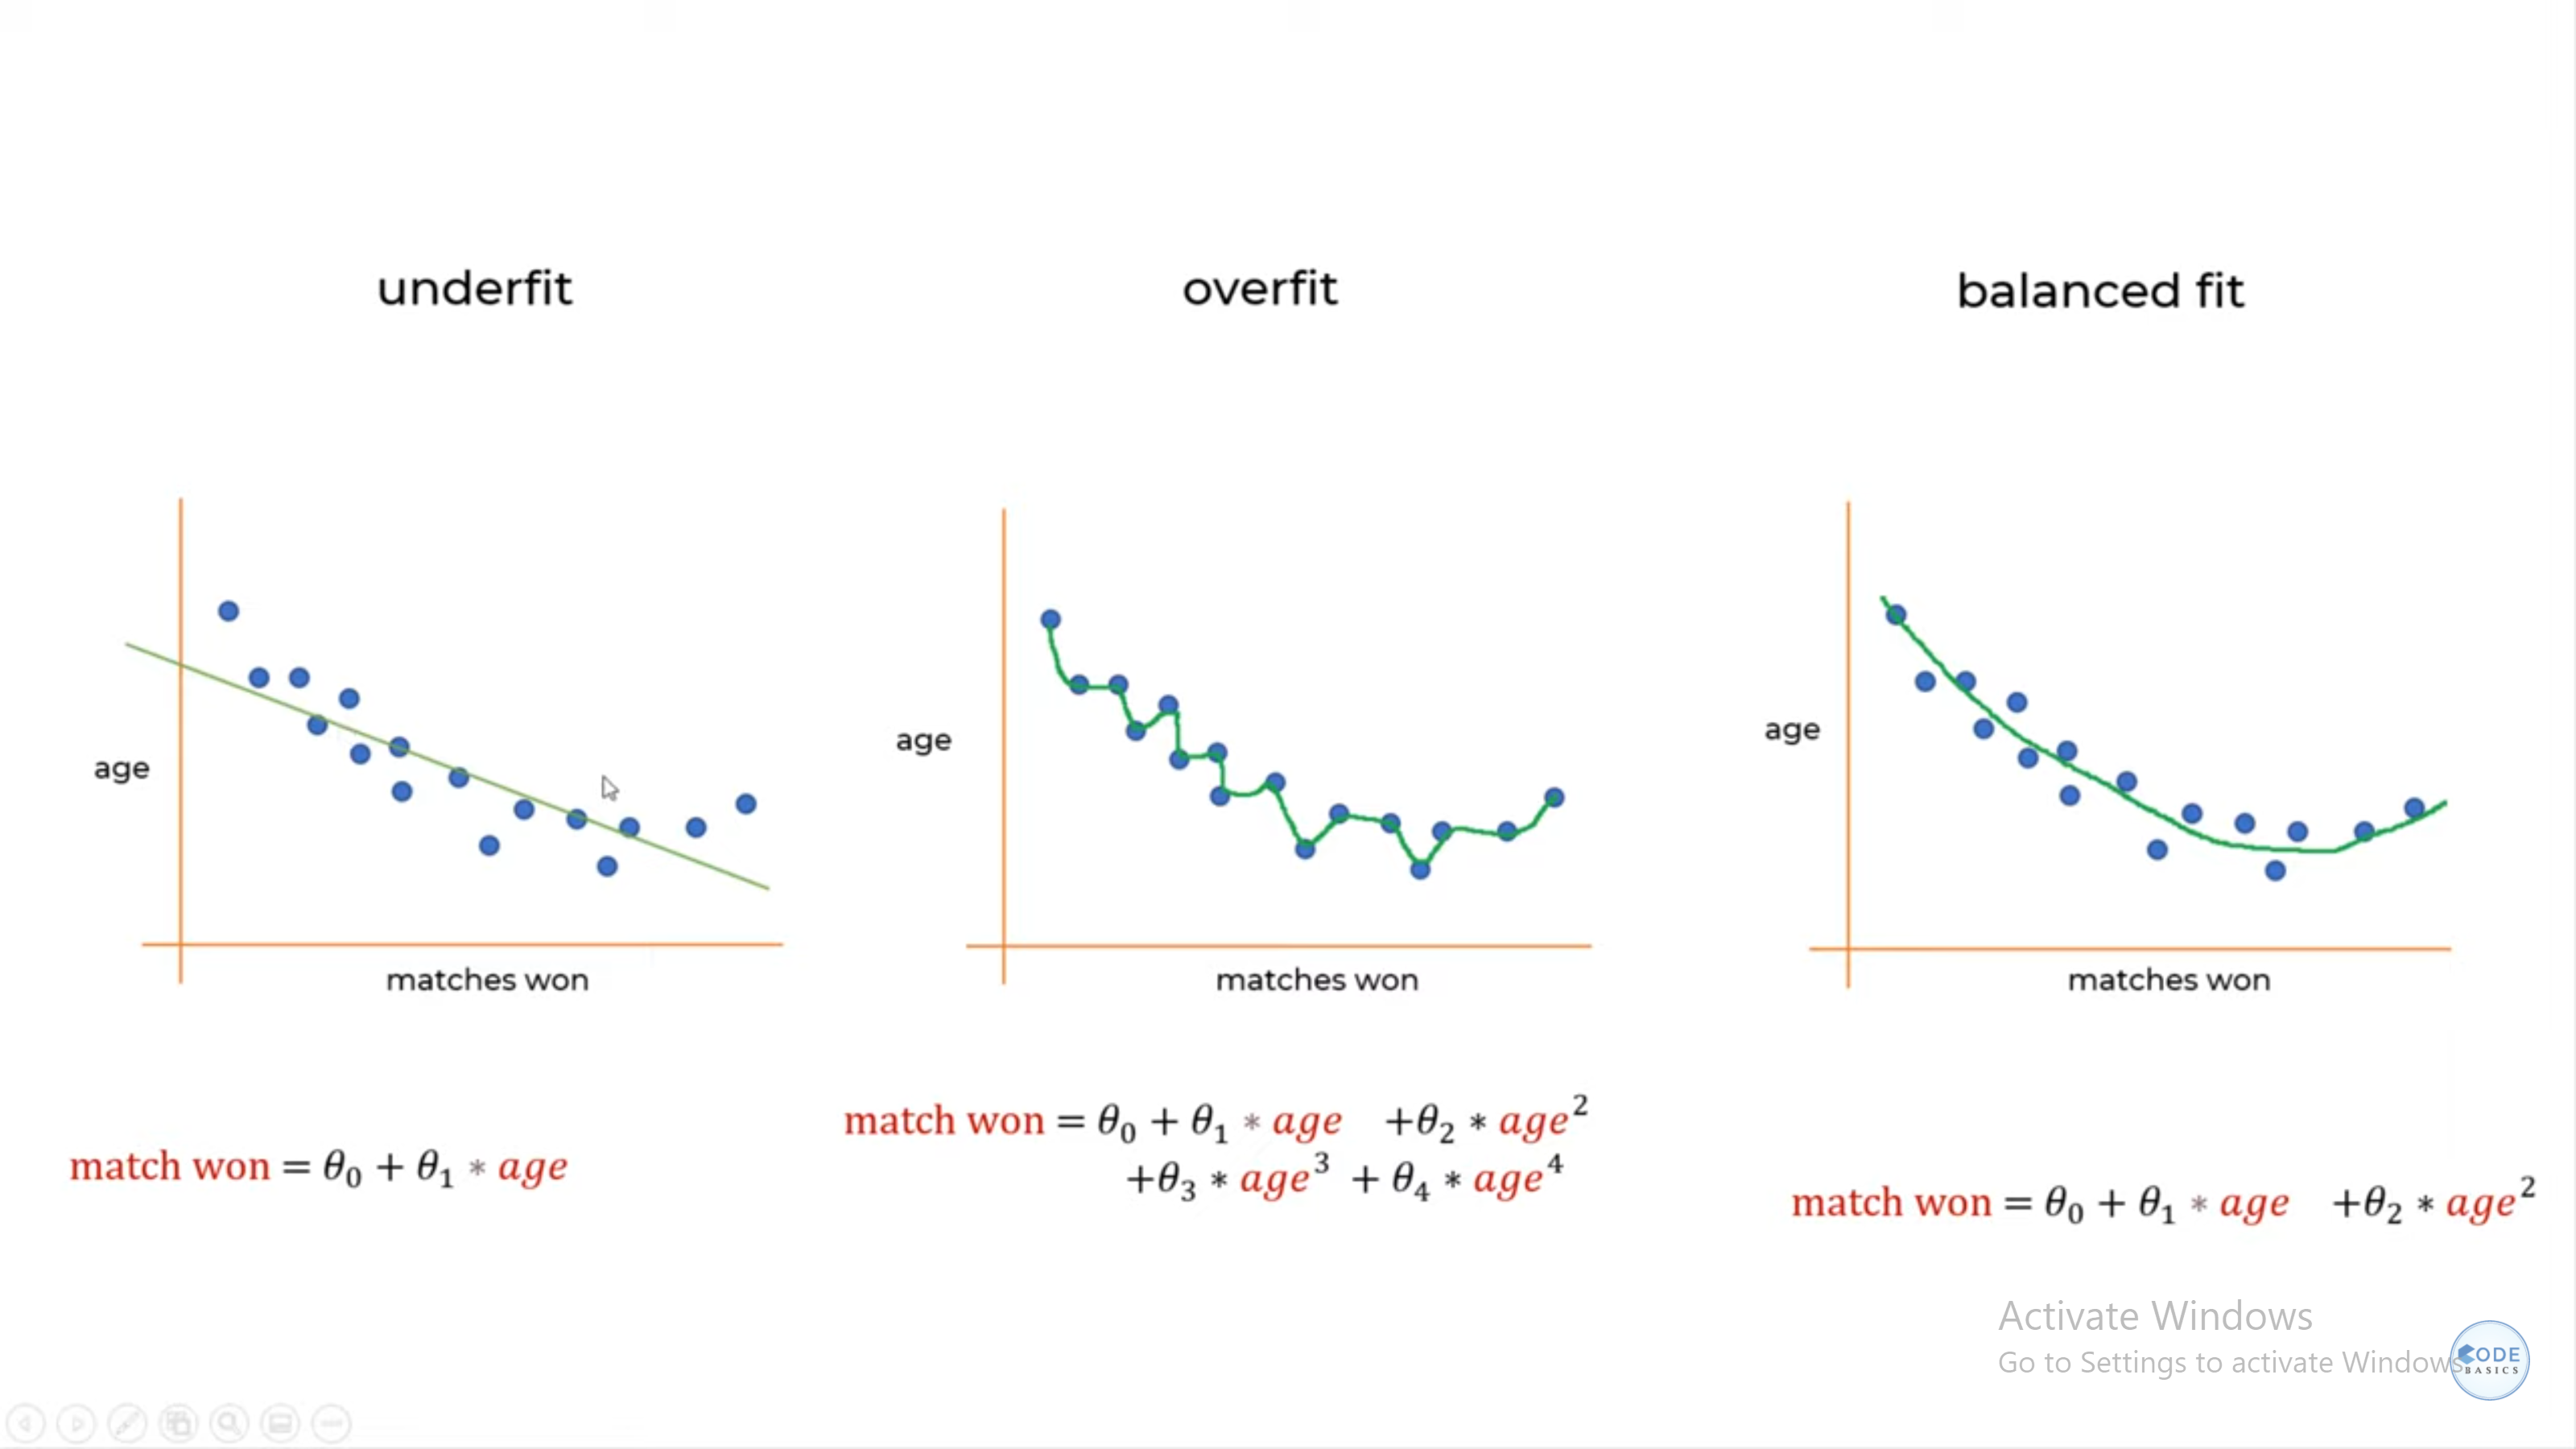


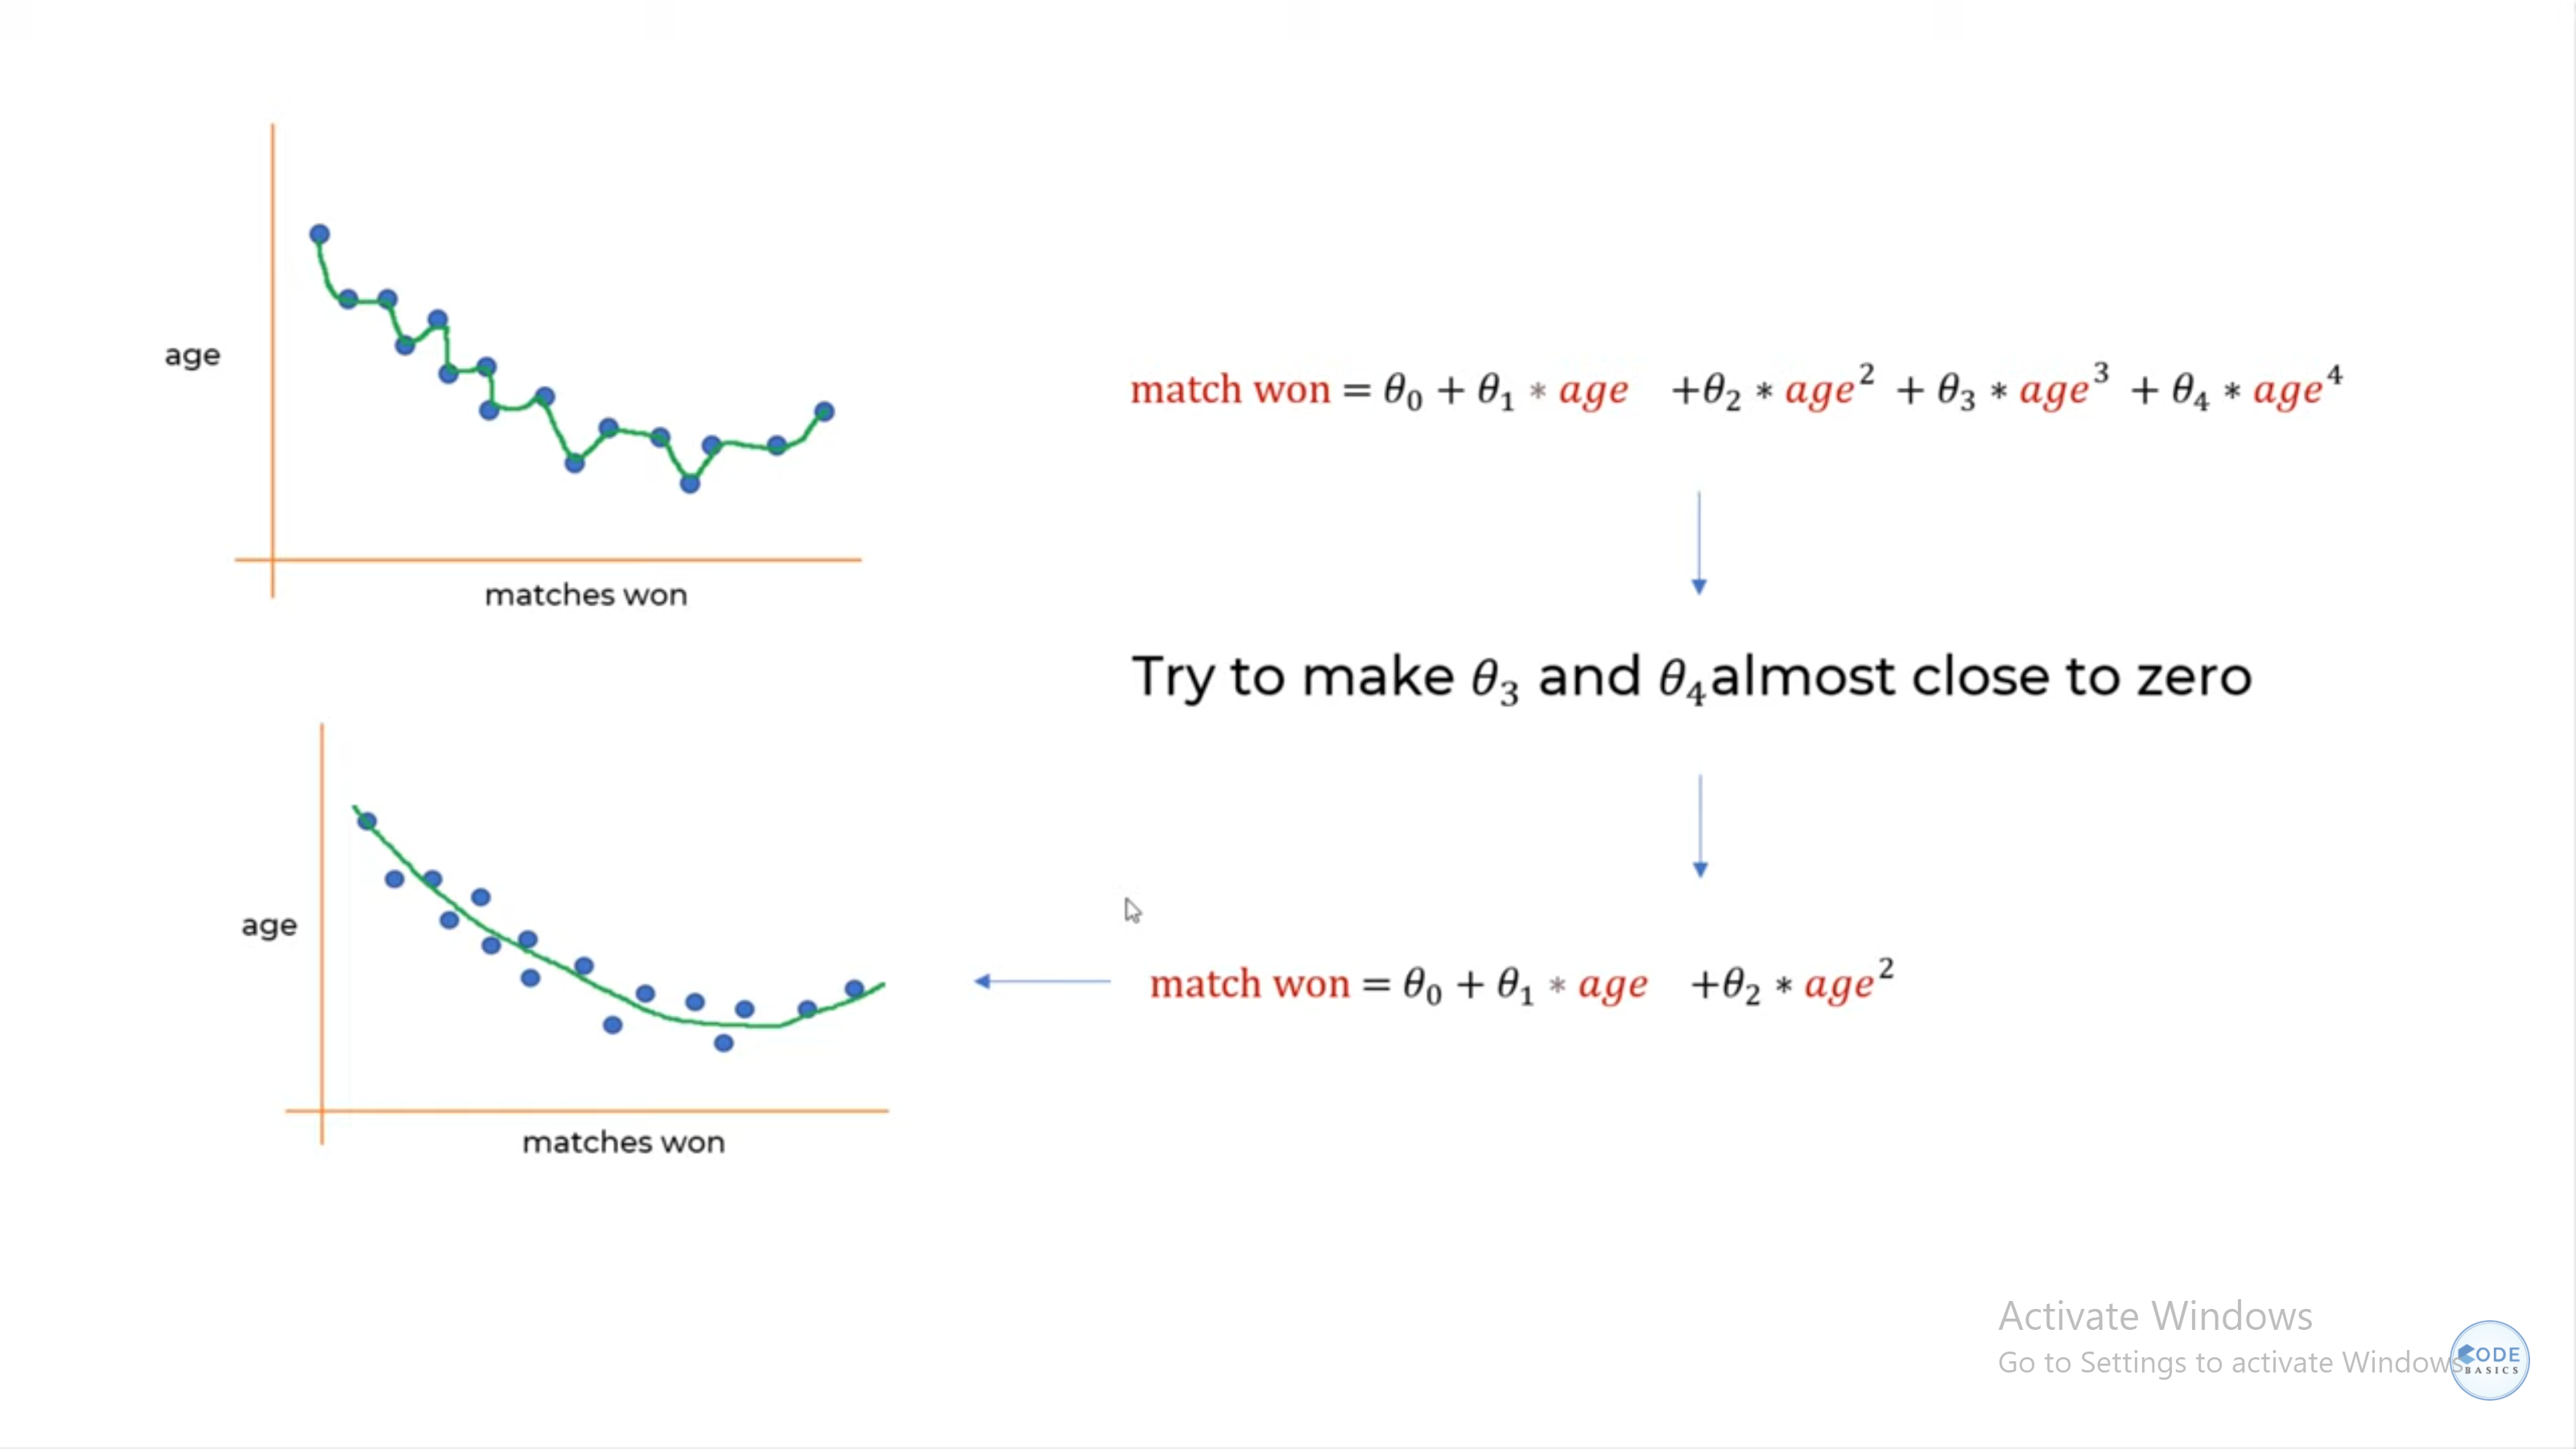

# **Perbedaan Ridge dan Lasso**


### **1. Jenis Penalti:**

* Ridge Regression (L2 Regularization): Menambahkan penalti berupa kuadrat dari koefisien (∑β²). Penalti ini cenderung menyusutkan semua koefisien, tetapi tidak sampai nol. Dengan kata lain, Ridge tidak mengeliminasi fitur secara penuh tetapi mengurangi magnitudonya.

* Lasso Regression (L1 Regularization): Menambahkan penalti berupa nilai absolut dari koefisien (∑|β|). Penalti ini dapat menyusutkan beberapa koefisien ke nol, yang berarti Lasso dapat mengeliminasi fitur yang kurang penting, sehingga juga berfungsi sebagai metode seleksi fitur.

### **2. Dampak pada Koefisien**:

* Ridge: Mengurangi magnitudo koefisien tanpa membuatnya menjadi nol, sehingga cocok untuk data di mana semua fitur dianggap relevan.

* Lasso: Dapat mengurangi beberapa koefisien hingga nol, sehingga Lasso lebih cocok ketika hanya sebagian dari fitur yang benar-benar relevan.

### **3. Interpretasi Model:**

* Ridge: Karena semua fitur tetap ada, interpretasi model bisa lebih sulit jika ada banyak fitur yang relevan.

* Lasso: Lebih mudah diinterpretasikan karena hanya fitur yang paling penting yang tetap memiliki koefisien yang tidak nol.

### **4. Penggunaan:**

* Ridge: Biasanya digunakan ketika kita memiliki banyak fitur yang sedikit berkorelasi dan tidak ingin mengecualikan fitur apapun.

* Lasso: Berguna ketika kita memiliki banyak fitur, dan kita ingin melakukan seleksi fitur secara otomatis dengan menghilangkan fitur yang tidak penting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
col_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 'Distance',
              'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
df = df[col_to_use]
df.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [4]:
df.isna().sum()

,0
Suburb,0
Rooms,0
Type,0
Method,0
SellerG,0
Regionname,3
Propertycount,3
Distance,1
CouncilArea,3
Bedroom2,8217


In [5]:
col_fill_to_zero = ['Propertycount','Distance','Bedroom2','Bathroom','Car']
df[col_fill_to_zero] = df[col_fill_to_zero].fillna(0)
df.isna().sum()

,0
Suburb,0
Rooms,0
Type,0
Method,0
SellerG,0
Regionname,3
Propertycount,0
Distance,0
CouncilArea,3
Bedroom2,0


In [6]:
df['Landsize'] = df['Landsize'].fillna(df.Landsize.mean())
df['BuildingArea'] = df['BuildingArea'].fillna(df.BuildingArea.mean())
df.isna().sum()

,0
Suburb,0
Rooms,0
Type,0
Method,0
SellerG,0
Regionname,3
Propertycount,0
Distance,0
CouncilArea,3
Bedroom2,0


In [7]:
df.dropna(inplace=True)
df.isna().sum()

,0
Suburb,0
Rooms,0
Type,0
Method,0
SellerG,0
Regionname,0
Propertycount,0
Distance,0
CouncilArea,0
Bedroom2,0


In [8]:
df.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,160.2564,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0000,1035000.0
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0000,1465000.0
5,Abbotsford,3,h,PI,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,94.0,160.2564,850000.0
6,Abbotsford,4,h,VB,Nelson,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,1.0,2.0,120.0,142.0000,1600000.0


In [11]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,False,...,False,False,False,False,False,False,False,False,True,False
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,False,...,False,False,False,False,False,False,False,False,True,False
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,False,...,False,False,False,False,False,False,False,False,True,False
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,False,...,False,False,False,False,False,False,False,False,True,False
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,False,...,False,False,False,False,False,False,False,False,True,False


In [12]:
X = df.drop('Price', axis=1)
y = df['Price']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
#

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [18]:
reg.score(X_train, y_train)
#0.6827792395792723

0.6827792395792723

In [19]:
reg.score(X_test, y_test)
#0.1385368316165222

0.1385368316165222



> Terjadi Overfitting karena score train dan test berbeda jauh!



In [20]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
reg_lasso.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+15, tolerance: 7.963e+14
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

In [22]:
reg_lasso.score(X_train, y_train)
#0.6766985624766824

0.6766985624766824

In [23]:
reg_lasso.score(X_test, y_test)
#0.6636111369404489

0.6636111369404489



> Perbedaan tidak jauh!



In [24]:
# prompt: import ridge

from sklearn.linear_model import Ridge
reg_ridge = Ridge(alpha=50, max_iter=100, tol=0.1)
reg_ridge.fit(X_train, y_train)


Ridge(alpha=50, max_iter=100, tol=0.1)

In [26]:
reg_ridge.score(X_train, y_train)
#0.6622376739684328

0.6622376739684328

In [27]:
reg_ridge.score(X_test, y_test)
#0.6670848945194958

0.6670848945194958

In [32]:
# prompt: import mse

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, reg.predict(X_test)),



(342275472103.6943,)

In [33]:
mean_squared_error(y_test, reg_lasso.predict(X_test))


133653603705.64285

In [34]:
mean_squared_error(y_test, reg_ridge.predict(X_test))

132273414674.9578

###harusnya pake Label Encoder bukan dummies agar kolomnya tidak banyak wkwkwkwkwkwwkwk